In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import scFates as scf
scv.set_figure_params(figsize=(3,3))
scf.set_figure_pubready()

In [2]:
adata=sc.read("data/adata_assigned.h5ad")

In [3]:
markers={"BCC":["Prss56","Egr2","Wif1","Hey2"],
    "ChC":["Th","Dbh","Chga","Chgb","Slc18a1","Slc18a2"],
         "enteric glia":["Phox2b","Ctgf","Nfia","Tgfb2","S100b"],
         "enteric neurons":["Ret", "Phox2a", "Chrna3","Sox11"],
         "melanocytes":["Dct","Mitf","Pmel","Tyr"],
         "mesenchyme":["Prrx1","Prrx2","Pdgfra"],
         "neural crest":["Sox9","Wnt1","Ets1"],
         "SC":["Mpz","Plp1","Fbxo7","Gjc3","Pmp22","Dhh","Mal"],
         "satellite glia":["Fabp7","Ptn","Rgcc"],
         "sensory neurons":["Prdm12","Isl2","Pou4f1","Six1"],
         "sympathetic neurons":["Cartpt","Prph","Mapt","Maoa"],
         "endoneurial\nfibroblasts":["Lum","Dcn","Fbn1"],
         }

In [4]:
adata.obs.assignments=adata.obs.assignments.cat.rename_categories(list(markers.keys())+["none"])

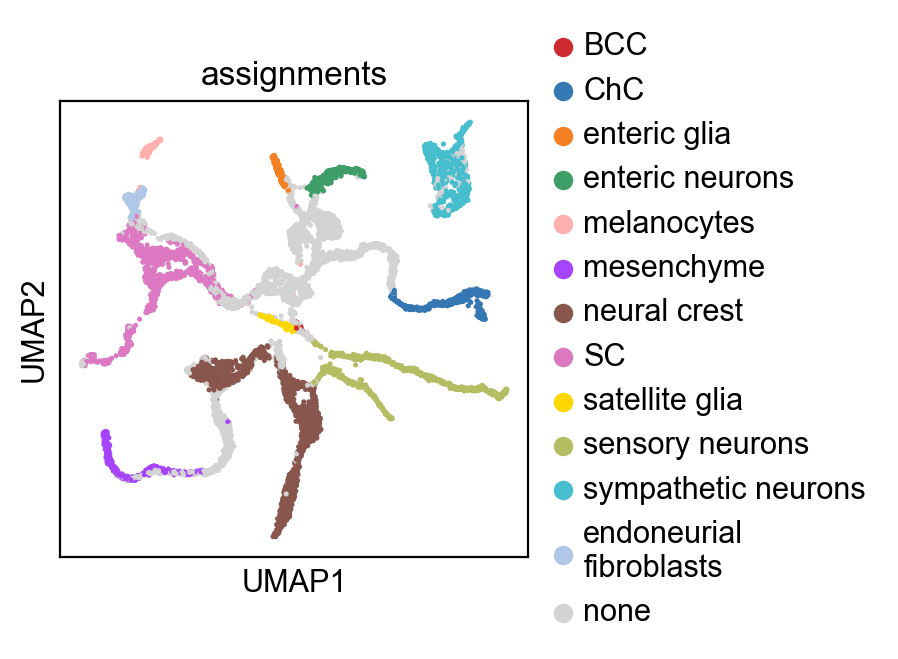

In [5]:
sc.pl.umap(adata,color="assignments")

In [6]:
celltypes=list(markers.keys())

In [7]:
txts=["\n"+"\n".join(markers[a]) for a in celltypes]

In [8]:
txts[-1]="\n"+txts[-1]

In [9]:
txts

['\nPrss56\nEgr2\nWif1\nHey2',
 '\nTh\nDbh\nChga\nChgb\nSlc18a1\nSlc18a2',
 '\nPhox2b\nCtgf\nNfia\nTgfb2\nS100b',
 '\nRet\nPhox2a\nChrna3\nSox11',
 '\nDct\nMitf\nPmel\nTyr',
 '\nPrrx1\nPrrx2\nPdgfra',
 '\nSox9\nWnt1\nEts1',
 '\nMpz\nPlp1\nFbxo7\nGjc3\nPmp22\nDhh\nMal',
 '\nFabp7\nPtn\nRgcc',
 '\nPrdm12\nIsl2\nPou4f1\nSix1',
 '\nCartpt\nPrph\nMapt\nMaoa',
 '\n\nLum\nDcn\nFbn1']

In [10]:
adata.obs.assignments.cat.categories

Index(['BCC', 'ChC', 'enteric glia', 'enteric neurons', 'melanocytes',
       'mesenchyme', 'neural crest', 'SC', 'satellite glia', 'sensory neurons',
       'sympathetic neurons', 'endoneurial\nfibroblasts', 'none'],
      dtype='object')

In [11]:
import pandas as pd
centers=pd.DataFrame([adata[adata.obs.assignments==a].obsm["X_umap"].mean(axis=0).tolist() for a in celltypes],
            columns=["x","y"])

In [12]:
cols=dict(zip(celltypes,adata.uns["assignments_colors"]))

In [13]:
cols

{'BCC': '#cc2c30',
 'ChC': '#3577b3',
 'enteric glia': '#f58023',
 'enteric neurons': '#3f9d68',
 'melanocytes': '#ffb0af',
 'mesenchyme': '#a644fb',
 'neural crest': '#88564c',
 'SC': '#dc79c2',
 'satellite glia': '#ffd700',
 'sensory neurons': '#b5bd63',
 'sympathetic neurons': '#47bece',
 'endoneurial\nfibroblasts': '#b1c7e7'}

In [14]:
def annotate(x,y,ha,i):
    ax.text(x, y, celltypes[i], va="top", ha=ha,fontsize=4,transform=ax.transAxes,
        c=cols[ celltypes[i]],fontdict={"fontweight":"bold"})
    ax.text(x, y, "%s"%txts[i], va="top", ha=ha,fontsize=4,transform=ax.transAxes,
           fontdict={"fontstyle":"italic"})

In [15]:
dat=adata[adata.obs.Hub_leiden=="True"].obsm["X_umap"]

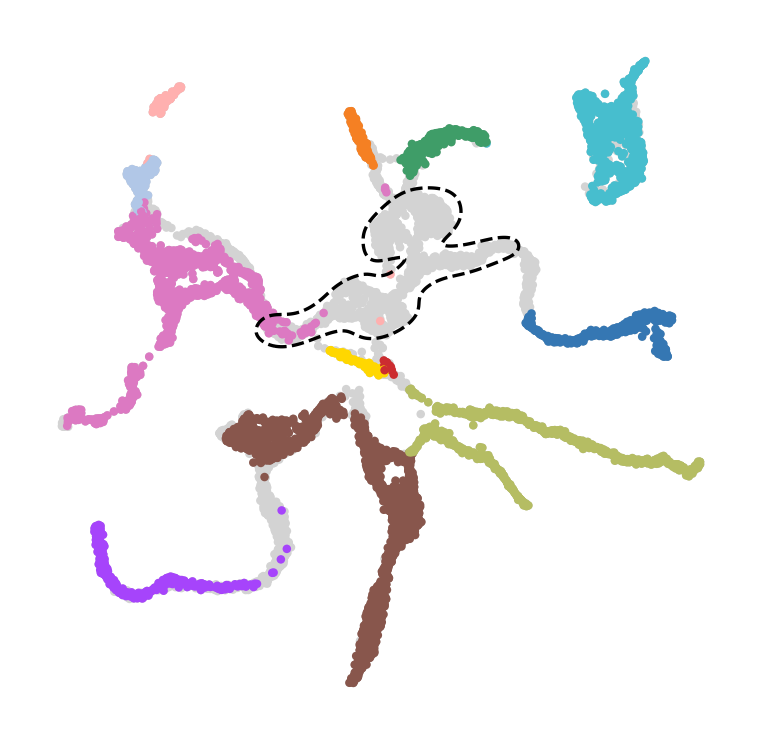

In [16]:
import seaborn as sns
scv.set_figure_params(figsize=(3,3),dpi=150)
ax=scv.pl.umap(adata,color="assignments",legend_loc="none",title="",
              groups=celltypes,show=False)
dat=adata[adata.obs.Hub_leiden=="True"].obsm["X_umap"]
sns.kdeplot(dat[:,0],dat[:,1],levels=1,ax=ax,bw=.3,thresh=.3,
            linestyles="--",linewidths=.8,colors="k")

plt.savefig("figures/fig1-B.pdf",dpi=600,bbox_inches="tight")

In [17]:
adata_velo=sc.read("data/adata_velo.h5ad")

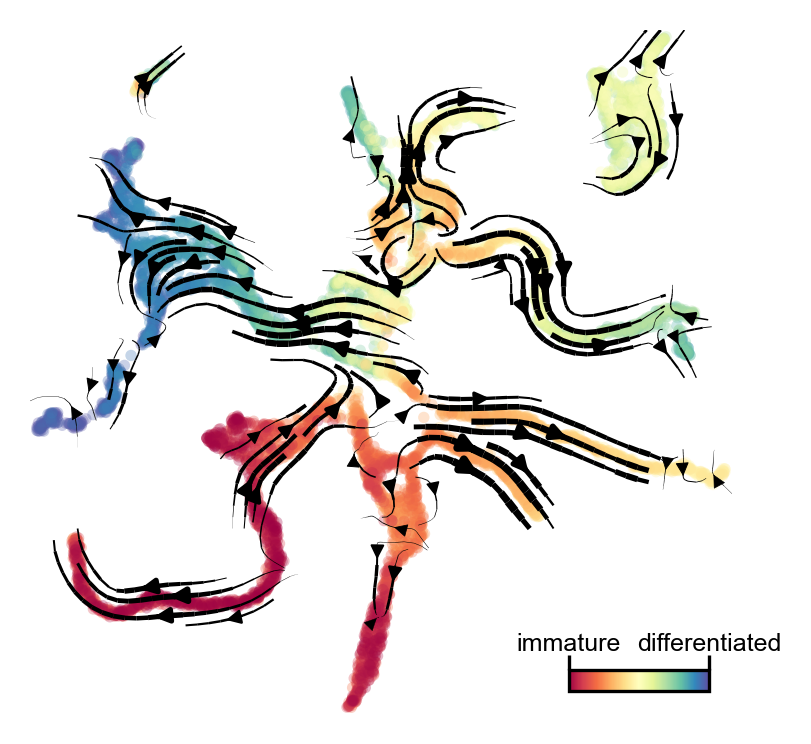

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
ax=scv.pl.velocity_embedding_stream(adata_velo,basis="umap",title="",
                                    color="CytoTRACE",colorbar=False,
                                    cmap="Spectral_r",s=30,arrow_size=.7,show=False)
cbaxes = inset_axes(ax, width="20%", height="3%", loc=4) 

cb1 = mpl.colorbar.ColorbarBase(cbaxes, cmap=mpl.cm.Spectral,
                                orientation='horizontal'  ,                    
                                ticks=None
                                )
cb1.set_ticks([0,1])
cb1.set_ticklabels(["immature","differentiated"])
cb1.ax.xaxis.set_ticks_position("top")
cb1.ax.tick_params(labelsize=6)
cb1.ax.xaxis.set_tick_params(pad=0)
ax.set_rasterized(True)
plt.savefig("figures/fig1-C.pdf",dpi=300,bbox_inches="tight")

In [19]:
adata.obs.devtime=adata.obs.devtime.cat.reorder_categories(['E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5', 'E14.5', 'E16.5',
       'E18.5', 'P0', 'P2', 'P6', 'P10',"Adult"])

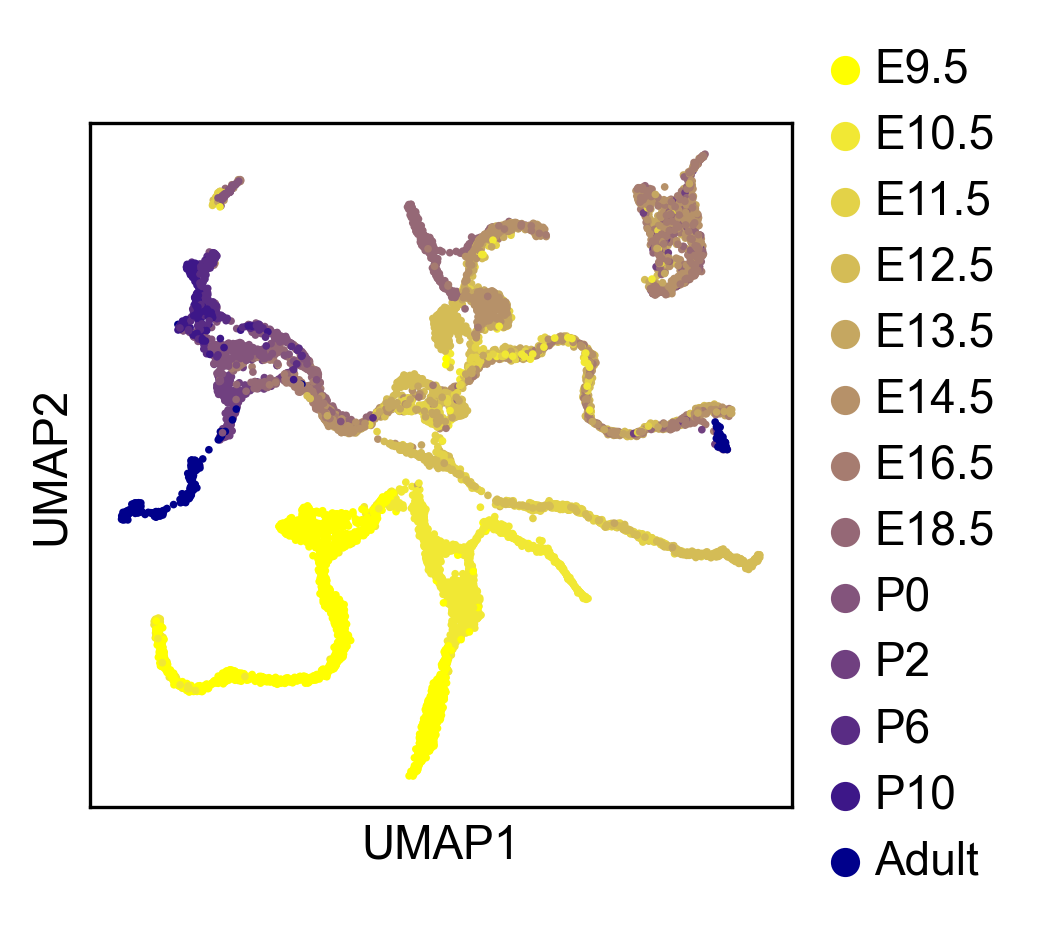

In [20]:
dev_pal=["#FFFF00","#F1E834","#E3D248","#D4BC56","#C5A761","#B69169","#A67C70","#956876","#83547C","#704080","#592C84","#3D1788","#00008B"]
sc.pl.umap(adata,color="devtime",
           palette=dev_pal,
           title="")

In [21]:
from matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list("devtime",dev_pal)

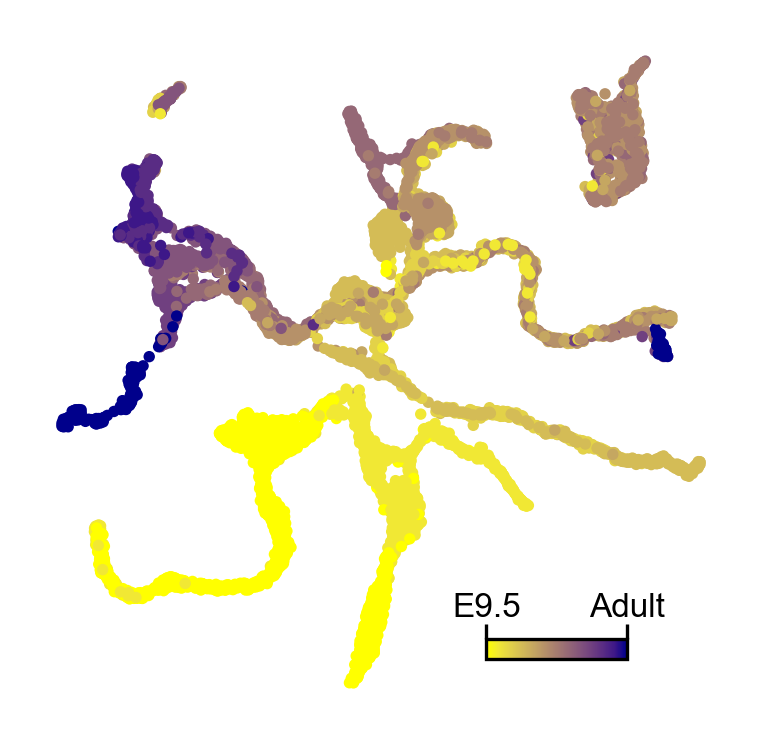

In [22]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl

from matplotlib.colors import LinearSegmentedColormap

ax=scv.pl.umap(adata,title="",legend_loc="none",
                                    color="devtime",s=30,show=False)
cbaxes = ax.inset_axes([0.65,.08,.2,.03]) 

cb1 = mpl.colorbar.ColorbarBase(cbaxes, cmap=LinearSegmentedColormap.from_list("devtime",dev_pal),
                                orientation='horizontal'  ,                    
                                ticks=None
                                )
cb1.set_ticks([0,1])
cb1.set_ticklabels(["E9.5","Adult"])
cb1.ax.xaxis.set_ticks_position("top")
cb1.ax.tick_params(labelsize=8)
cb1.ax.xaxis.set_tick_params(pad=0)
plt.savefig("figures/fig1-D.pdf",dpi=300,bbox_inches="tight")

In [23]:
#sc.pp.scale(adata)
scv.tl.score_genes_cell_cycle(adata_velo,)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


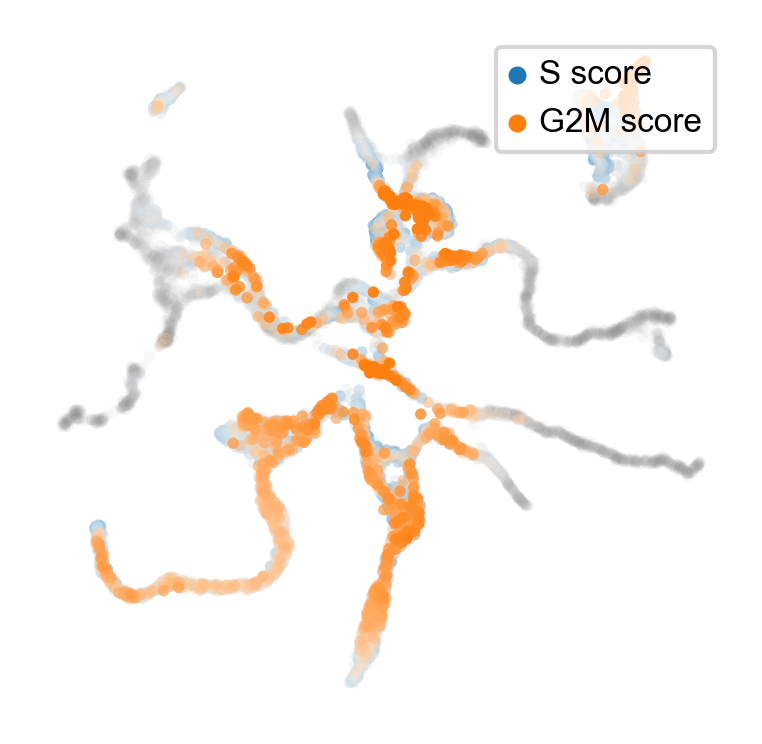

In [24]:
ax=scv.pl.scatter(adata_velo, color_gradients=['S_score', 'G2M_score'],size=30,
                  smooth=True, perc=[5, 95],legend_loc="none",show=False)
lgnd = plt.legend(loc=1,prop={'size': 8})
lgnd.legendHandles[0]._sizes=[11]
lgnd.legendHandles[1]._sizes=[11]
plt.savefig("figures/fig1-E.pdf",dpi=300,bbox_inches="tight")

In [25]:
adata_scenic=sc.read("data/adata_scenic.h5ad")
adata_scenic.uns=adata.uns
adata_scenic.obs=adata.obs

In [27]:
import numpy as np

In [54]:
np.random.seed(42)
sel=np.random.choice(adata.obs_names,adata.shape[0],replace=False)

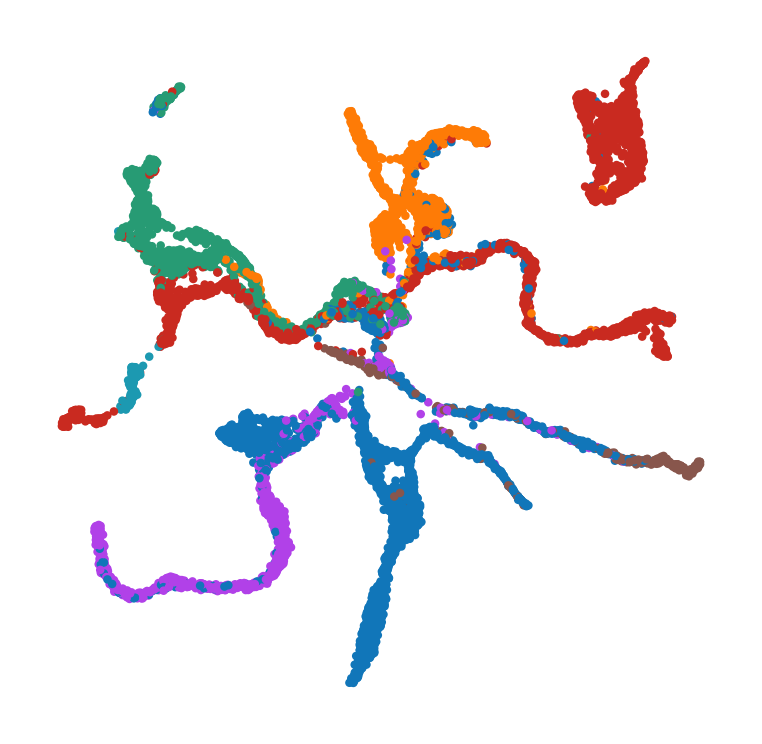

In [55]:
scv.pl.umap(adata[sel],title="",legend_loc="none",color="location")

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


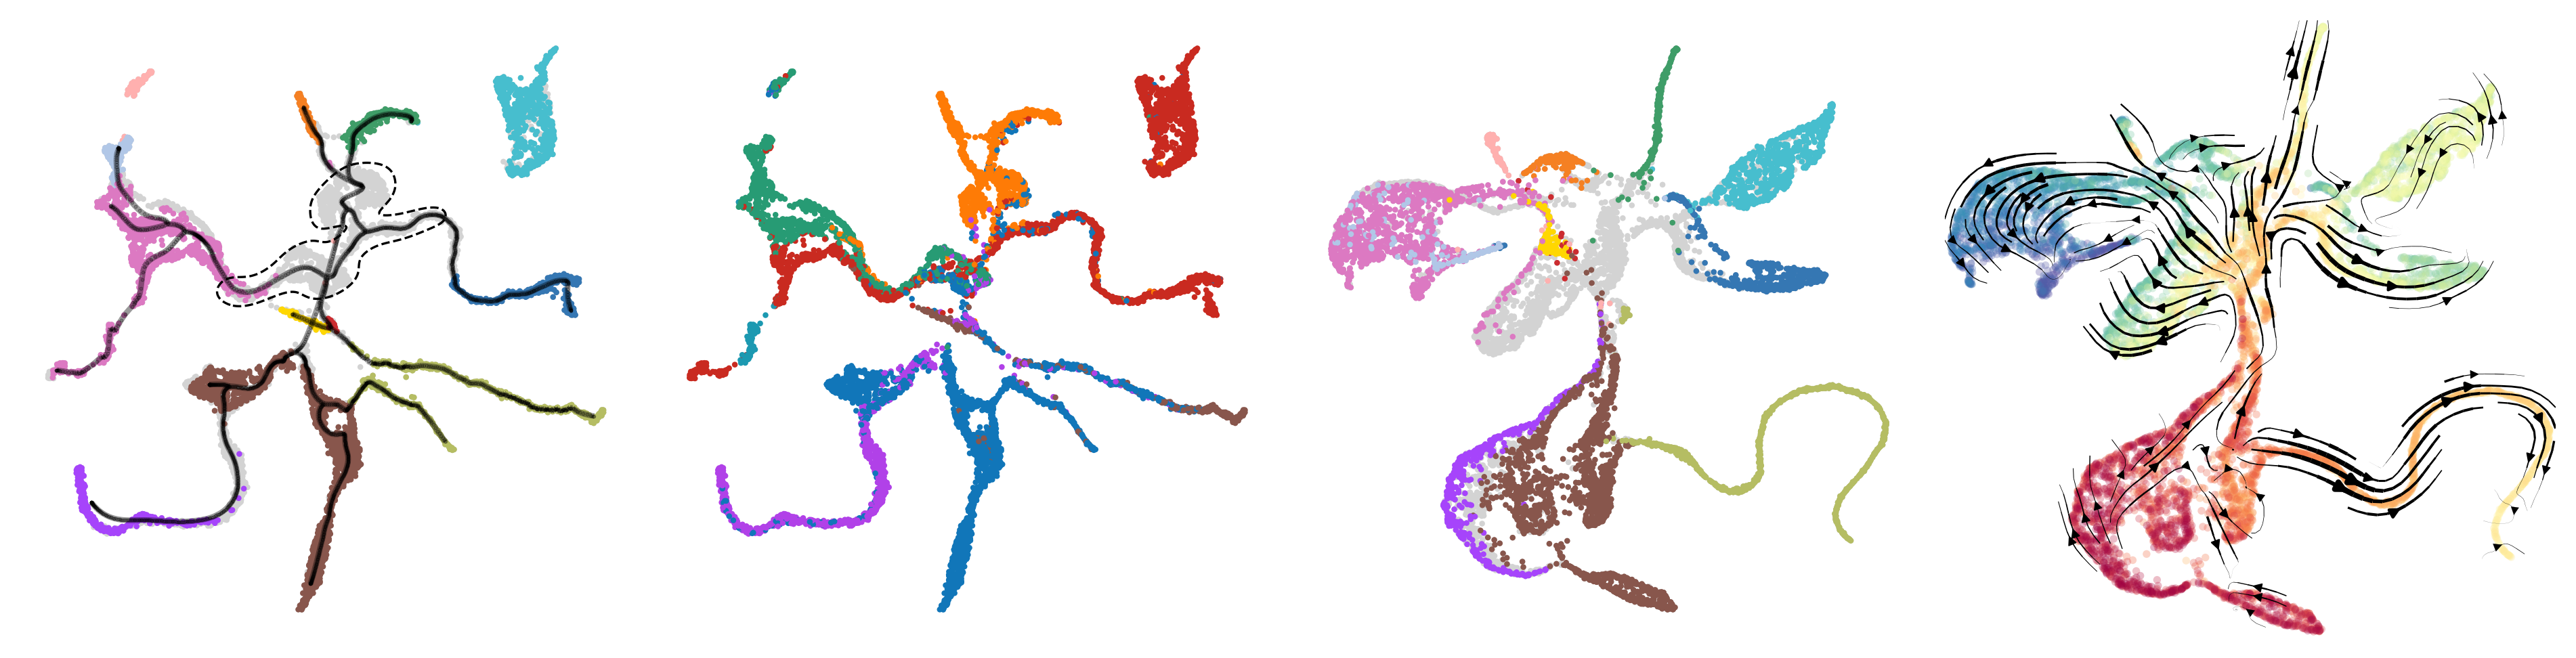

In [56]:
import matplotlib.gridspec as gridspec
adata_tree=sc.read("data/adata_tree.h5ad")
fig,axs = plt.subplots(1,4,figsize=(16,4))
scv.pl.umap(adata,color="assignments",legend_loc="none",title="",
              groups=celltypes,show=False,ax=axs[0])

scf.pl.graph(adata_tree,size_nodes=.1,alpha_nodes=.4,alpha_seg=.4,tips=False,forks=False,frameon=False,alpha=0,show=False,ax=axs[0])

dat=adata[adata.obs.Hub_leiden=="True"].obsm["X_umap"]
sns.kdeplot(dat[:,0],dat[:,1],levels=1,ax=axs[0],bw=.3,thresh=.3,
            linestyles="--",linewidths=.8,colors="k")


scv.pl.umap(adata[sel],title="",legend_loc="none",color="location",show=False,ax=axs[1])


adata_velo.obsm=adata_scenic.obsm
scv.pl.velocity_embedding_stream(adata_velo,basis="umap",title="",
                                    color="CytoTRACE",colorbar=False,
                                    cmap="Spectral_r",s=30,arrow_size=.7,show=False,ax=axs[3])
axs[3].set_rasterized(True)

obsm_copy=adata.obsm.copy()
adata.obsm=adata_scenic.obsm

scv.pl.umap(adata,color="assignments",legend_loc="none",title="",
              groups=celltypes,show=False,ax=axs[2])
adata.obsm=obsm_copy
plt.subplots_adjust(wspace=0.05)
plt.savefig("figures/fig1-E.pdf",dpi=300,bbox_inches="tight")

In [31]:
%%bash
cat<<EOF >fig1.tex
\documentclass[11pt]{article}
\usepackage[paperheight=211mm,paperwidth=180mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}

\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\scriptsize 
\raggedright \textbf{A} \textcolor{Blue}{Workflow of single cell transcriptomic analysis of neural crest and Schwann cell lineages}
\includegraphics[width=1\textwidth]{figures/fig1-A.pdf}
\begin{minipage}[!ht]{0.68\textwidth}
\raggedright \textbf{B} \textcolor{Blue}{Cell type assignment using known modules\vspace{-10pt}}
\includegraphics[width=1\textwidth]{figures/fig1-B.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{0.32\textwidth}
\raggedright \textbf{C} \textcolor{Blue}{CytoTRACE \& RNA velocity\vspace{-5pt}}
\includegraphics[width=1\textwidth]{figures/fig1-C.pdf}
\raggedright \textbf{D} \textcolor{Blue}{Dev. time}
\includegraphics[width=1\textwidth]{figures/fig1-D.pdf}
\end{minipage}\hfill

\raggedright \textbf{E} \textcolor{Blue}{Moar plots}
\includegraphics[width=1\textwidth]{figures/fig1-E.pdf}

\clearpage


EOF

echo "\end{document}" >> fig1.tex

xelatex --shell-escape fig1.tex
rm fig1.tex
convert -flatten -density 300 fig1.pdf fig1.jpg

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig1.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def))
(/usr/share/texlive/texmf-dist

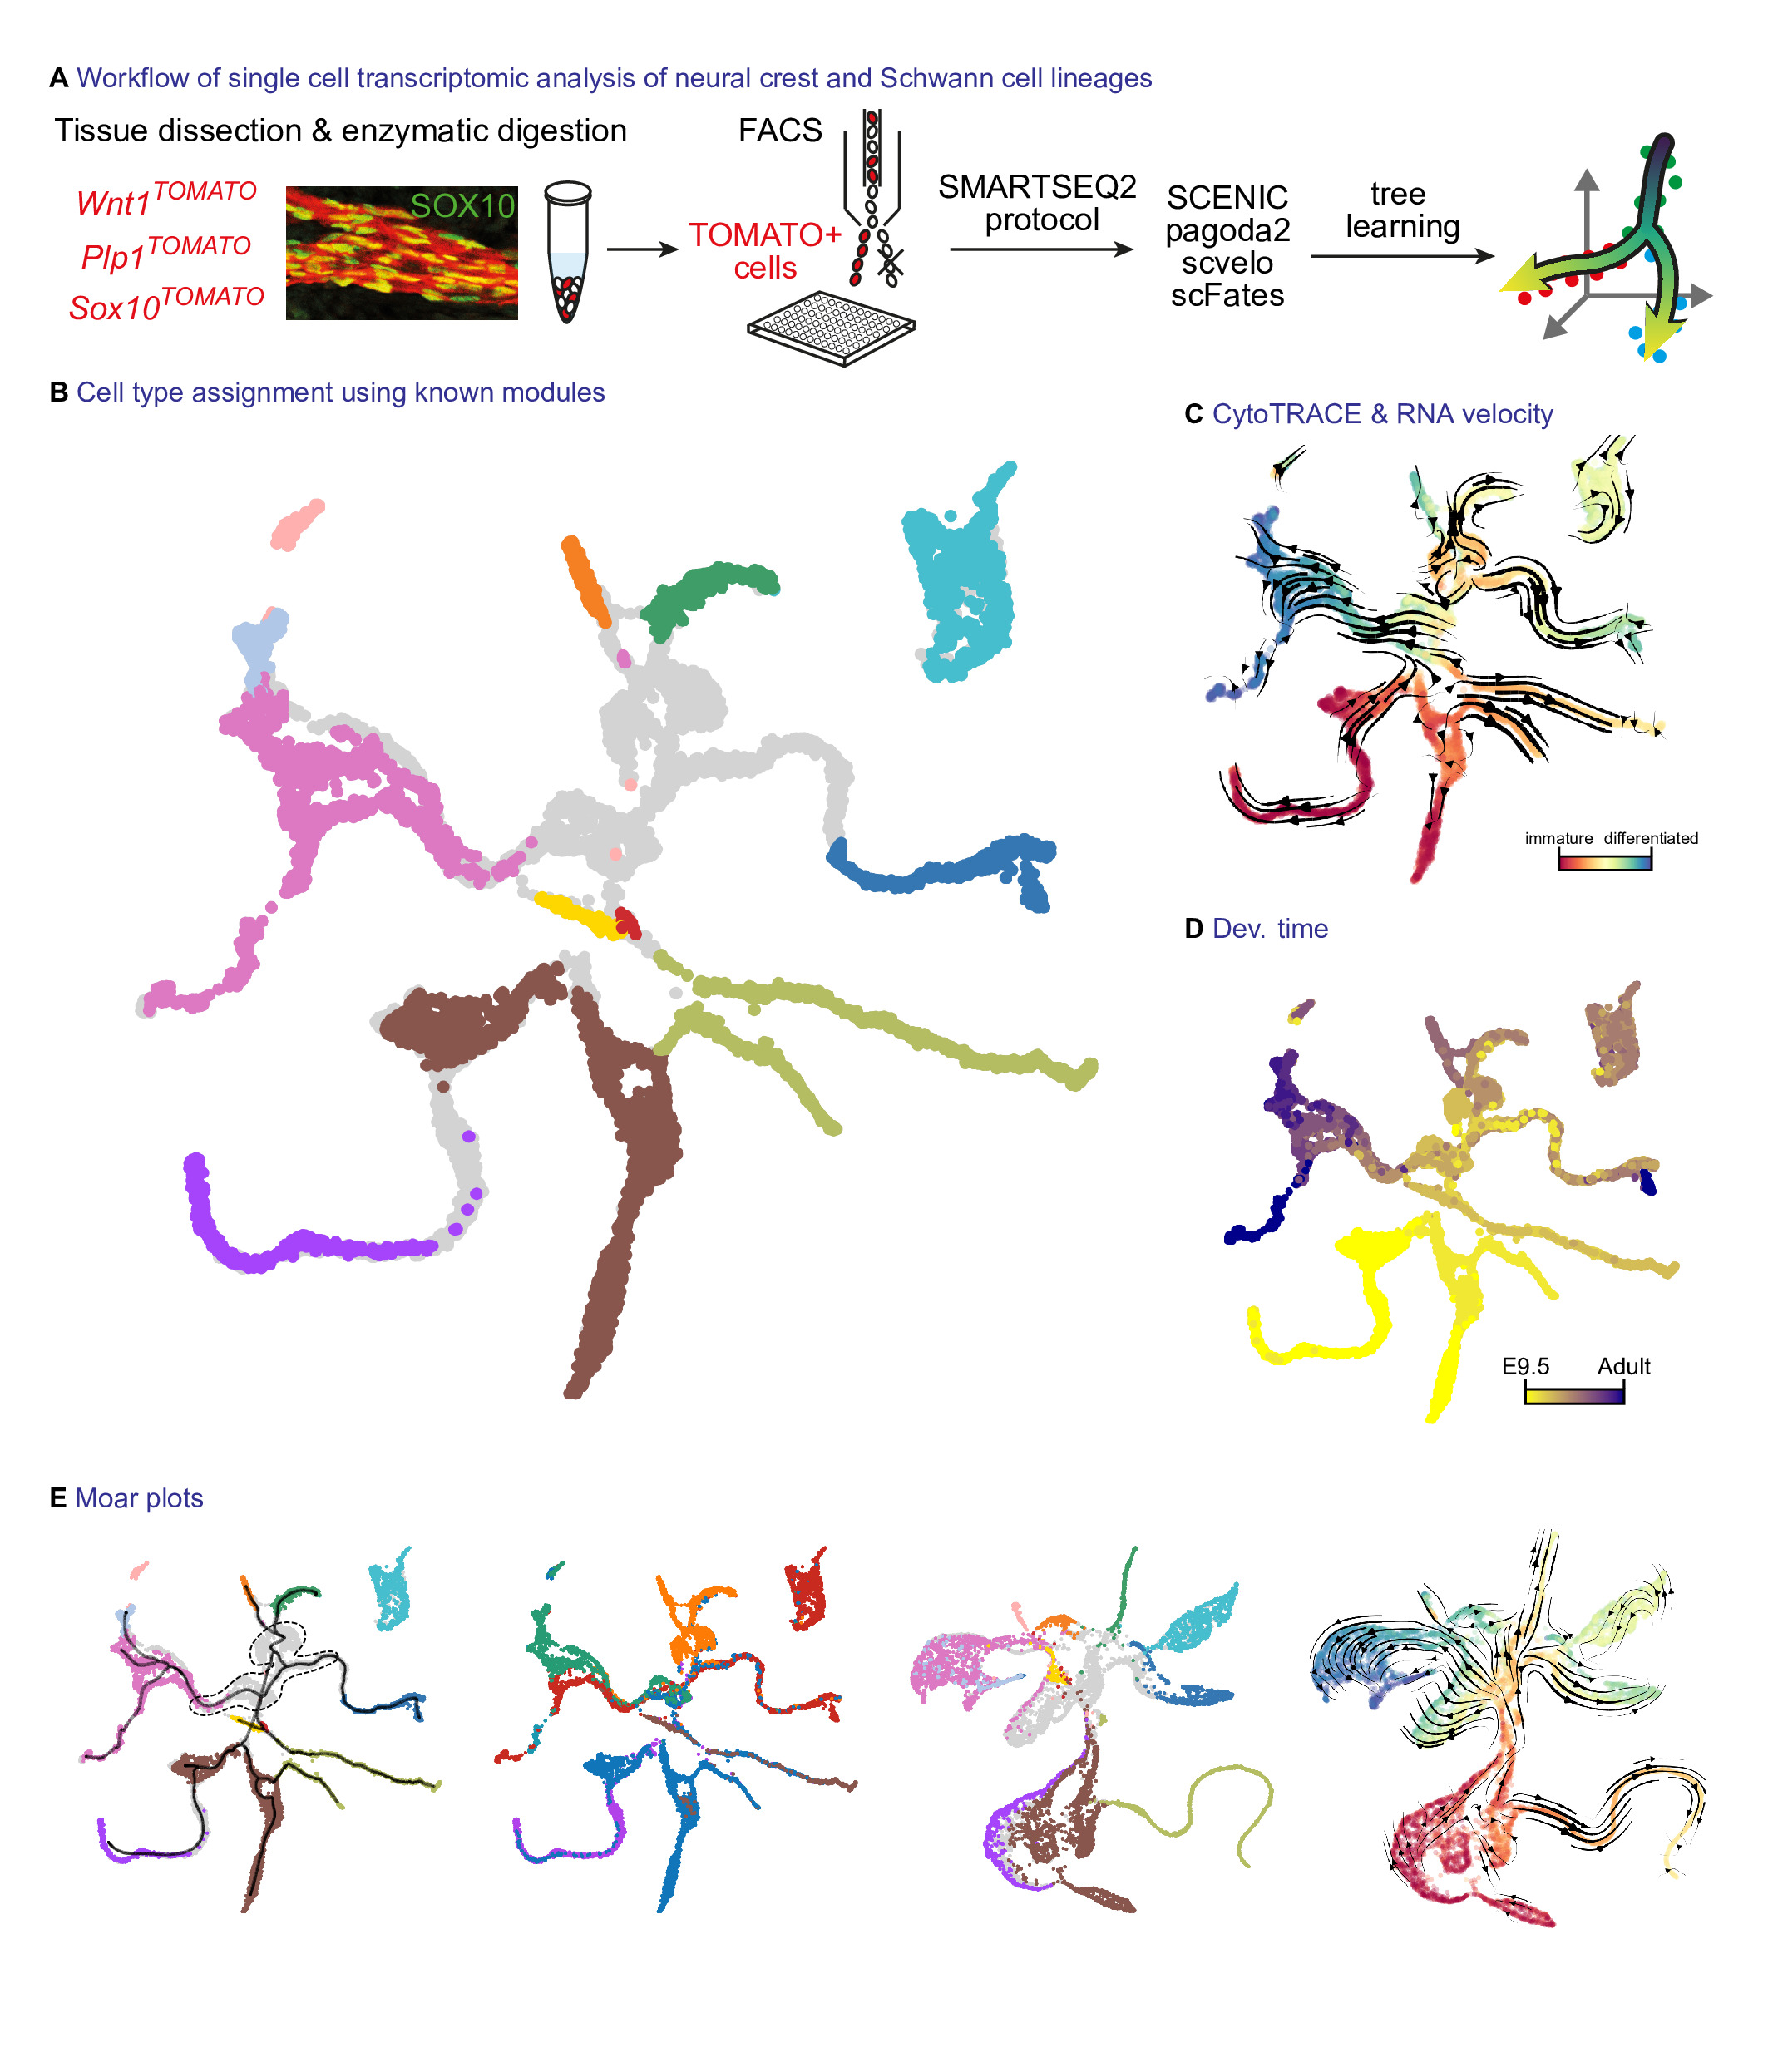

In [32]:
from IPython.display import Image
Image(filename='fig1.jpg') 